 <a id='ReturntoTop'></a>
<header>
  <div style="display:flex; align-items:center;">
    <div style="flex-grow:1;">
      <h1>Oregon Wildlife - Image Classification Capstone</h1>
      <h3>Notebook 6 - "Prediction Playground"</h3>
      <p>Author: David Lappin | Company: BrainStation | Date: 3/1/2023 - 4/11/2023 </p>
    </div>
    <img src="randphotos/bannereagle.jpg" alt="your-image-description" style="height:150px; margin-left:20px; border: 4px solid black;border-radius: 5%;">
  </div>
</header>

------------------------------------------------------------------------------------------------------------------------------

# Introduction and Purpose


The purpose of this notebook is simply to provide a confined space to load the models we created and predict with new data if desired. There are no additional project steps taken in the code below, only an abbreviated version.

# Table of Contents

[Packages Import](#1)

[Load in Previous Models](#2)

[Define Our Prediction Function](#3)

[Set Data Paths](#4)

[Use Function](#5)


 # Packages Import:
 <a id='1'></a>
[Return to Top](#ReturntoTop)

**Matplotlib** - Used as needed for basic visualizations

**Numpy** - Supports large, multi-dimensional arrays and matrices,and contains a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** - Additional data manipulation and analysis

**OS** - interaction with the native OS Python (used for establishing relative path to data files)

**PIL** - Python Imaging Library. Original support for python to deal with images

**glob** - Useful for finding pathname sbased on specific patterns

**sklearn** - machine learning library

**seaborn** - graphing and visualization package

**visualkeras** - allows to visualize CNN model architechture

**Tensorflow** - Machine learning and artificial intelligence with particular focus on training and inference of deep neural networks

**Keras** - Application Program interface (API) built on tensorflow. Used for implementing neural networks (supports backend computation in tensor flow up to 2.3)

     

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import visualkeras


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

# Load in Previous Models:
 <a id='2'></a>
[Return to Top](#ReturntoTop)

Load in all of the previous models or any new models you created:

In [7]:
#our baseline model
baseline = keras.models.load_model("models/Baseline.h5") 

#our first model with regularization strategies
regularization_strat = keras.models.load_model("models/Batch_normalization.h5") 

#our adjusted regularization model
regularization_strat_adj = keras.models.load_model("models/Reg_model.h5") 

#our transfer learning model
t_learn = keras.models.load_model("models/MobileNetV2.h5") 

#our transfer learning model with fine tuning 
t_learn_ft = keras.models.load_model("models/MobileNetV2_finetuned.h5") 


# Define Our Prediction Function:
 <a id='3'></a>
[Return to Top](#ReturntoTop)


Lets re-define our prediction model from the previous notebook. The function will take in a defined model that we can load in and pre-set image paths based on where the images are stored:

In [8]:
def predict_class(img_path, model):
    
    """
    This function will take in a defined image path as well as the name of the loaded model and then 
    it will show that image, predict on it, and print the prediction
    """
    
    # Define the image size expected by the model
    img_height, img_width = model.input_shape[1:3]

    # Load the image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Show the image
    plt.imshow(img)
    plt.show()

    # Convert the image to an array and create a batch
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction on the image
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    #create a list of all class names
    class_names = ['bald_eagle', 'black_bear', 'bobcat', 'canada_lynx', 'columbian_black-tailed_deer', 'cougar', 
                   'coyote', 'deer', 'elk', 'gray_fox', 'gray_wolf', 'mountain_beaver', 'nutria', 'raccoon', 'raven', 
                   'red_fox', 'ringtail', 'sea_lions', 'seals', 'virginia_opossum']
    
    # Get the predicted class label and confidence
    pred_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    # Print the predicted class label and confidence
    print("This image most likely belongs to {} with a {:.2f}% confidence."
          .format(pred_class, confidence))

# Set Our Data Paths:
 <a id='4'></a>
[Return to Top](#ReturntoTop)

**Note** These are relative paths to data not included in this project. You can create a random photo folder in the main working directory and call to photos like in the example below. You can also use the code to test on any of the data in your test directory as well. You can refer to the sample file structure in the repository for more detail.

In [12]:
#Set some image paths 

img1 = "randphotos/deer/cardeer1.jpg"
img2 = 'randphotos/eagle/mleagle2.jpg'
img3 = "randphotos/raccoon/alracc1.JPG"
img4 = "randphotos/joke/fizz1.jpg"
img5 = 'randphotos/bobcat/bobcat1.jpg'

# Use the Function:
 <a id='5'></a>
[Return to Top](#ReturntoTop)

We can use this function on one image at a time:

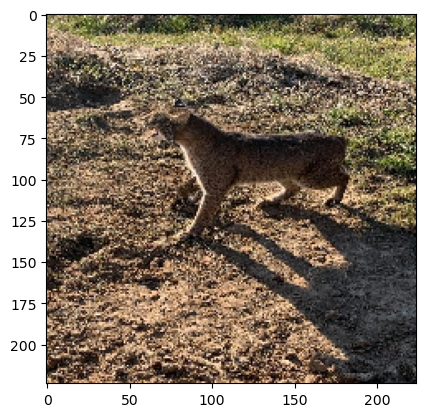

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to bobcat with a 12.32% confidence.


In [13]:
#Use function on one image
predict_class(img5, t_learn_ft)

Or we can use it on a few images at a time by storing each path in a list and looping through the list:

In [10]:
#create a list of the image path variables defined above
function_test_list = [img1, img2, img3, img4]

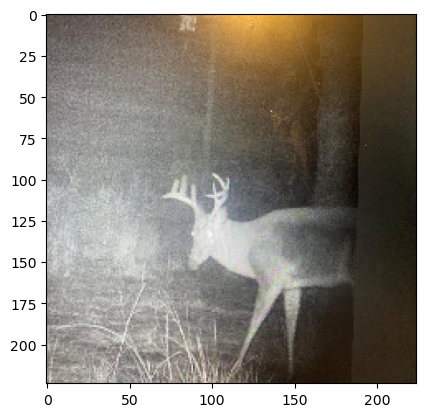

1/1 [==============================] - 2s 2s/step
This image most likely belongs to deer with a 12.50% confidence.


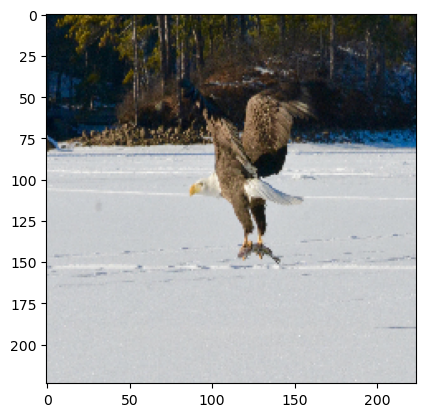

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to bald_eagle with a 12.52% confidence.


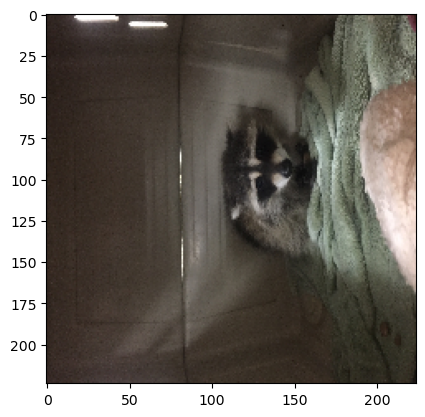

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to raccoon with a 11.98% confidence.


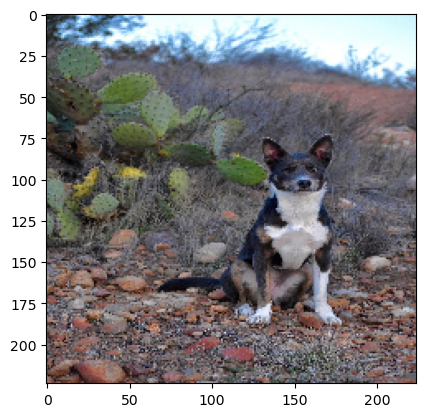

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to ringtail with a 8.64% confidence.


In [11]:
#loop through each variable in the list
for x in function_test_list:
    
    #use function to show image and prediction
    predict_class(x, t_learn_ft)

Hey that's not a ringtail...That's my sister's dog Fizz. Not a bad guess tho! 

------------------------------------------------------------------------------------------------------------------------------